#Import Libraries

In [1]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium


#Mount GoogleDrive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Import Covid Dataset

In [3]:
df_worldwide_cases = pd.read_csv('/content/gdrive/MyDrive/Monkeypox/Monkey_Pox_Cases_Worldwide.csv')
df_daily_countryWise = pd.read_csv('/content/gdrive/MyDrive/Monkeypox/Worldwide_Case_Detection_Timeline.csv')
df_detection_timeline = pd.read_csv('/content/gdrive/MyDrive/Monkeypox/Daily_Country_Wise_Confirmed_Cases.csv')

In [4]:
df_worldwide_cases

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3050.0,0.0,5.0,2.0,7.0
1,Portugal,770.0,0.0,0.0,0.0,34.0
2,Spain,5792.0,0.0,13.0,2.0,0.0
3,United States,14050.0,0.0,4.0,41.0,10.0
4,Canada,1111.0,11.0,1.0,3.0,0.0
...,...,...,...,...,...,...
110,Central African Republic,8.0,9.0,0.0,0.0,0.0
111,Republic of Congo,3.0,5.0,0.0,0.0,0.0
112,Cameroon,7.0,27.0,0.0,0.0,0.0
113,Liberia,2.0,0.0,0.0,0.0,0.0


Monkeypox dataset Information

In [5]:
# Reading the dataset information before Data Preprocessing
df_worldwide_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             115 non-null    object 
 1   Confirmed_Cases     115 non-null    float64
 2   Suspected_Cases     115 non-null    float64
 3   Hospitalized        115 non-null    float64
 4   Travel_History_Yes  115 non-null    float64
 5   Travel_History_No   115 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.5+ KB


From the above dataset, we can see invalid datypes for the columns.

So, Data Cleaning and Data Preprocessing need to be performed on the dataset.

In [6]:
df_worldwide_cases.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
count,115.000000,115.000000,115.000000,115.000000,115.000000
mean,354.643478,21.269565,1.173913,2.165217,0.747826
std,1512.637056,197.288653,2.902693,4.998123,3.679825
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,1.000000,0.000000
75%,64.000000,0.000000,1.000000,2.000000,0.000000
max,14050.000000,2103.000000,18.000000,41.000000,34.000000


In [7]:
df_worldwide_cases.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3050.0,0.0,5.0,2.0,7.0
1,Portugal,770.0,0.0,0.0,0.0,34.0
2,Spain,5792.0,0.0,13.0,2.0,0.0
3,United States,14050.0,0.0,4.0,41.0,10.0
4,Canada,1111.0,11.0,1.0,3.0,0.0


In [8]:
# converting 'float' datatype columns into int data format
df_worldwide_cases = df_worldwide_cases.astype({'Confirmed_Cases': 'int', 'Suspected_Cases': 'int', 'Hospitalized': 'int', 'Travel_History_Yes': 'int', 'Travel_History_No': 'int'})

In [9]:
# Reading the dataset information after Data Preprocessing
df_worldwide_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             115 non-null    object
 1   Confirmed_Cases     115 non-null    int64 
 2   Suspected_Cases     115 non-null    int64 
 3   Hospitalized        115 non-null    int64 
 4   Travel_History_Yes  115 non-null    int64 
 5   Travel_History_No   115 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.5+ KB


**Top 10 Countries with most no. of Confirmed cases** 

In [10]:
t10_countries_Conf = df_worldwide_cases.groupby(by='Country').max()[['Confirmed_Cases']].sort_values(by=['Confirmed_Cases'],ascending=False).reset_index().head(10)
# t10_countries_Conf.head(10).style.background_gradient(cmap='Pastel1_r')
t10_countries_Conf.style.background_gradient(cmap='Pastel1_r')

,Country,Confirmed_Cases
0,United States,14050
1,Spain,5792
2,Brazil,3450
3,Germany,3242
4,England,3050
5,France,2735
6,Canada,1111
7,Netherlands,1087
8,Peru,891
9,Portugal,770


**Top 10 Countries with most no. of Suspected cases**

In [11]:
t10_countries_Susp = df_worldwide_cases.groupby(by='Country').max()[['Suspected_Cases']].sort_values(by=['Suspected_Cases'],ascending=False).reset_index().head(10)
t10_countries_Susp.style.background_gradient(cmap='Pastel1_r')

,Country,Suspected_Cases
0,Democratic Republic Of The Congo,2103
1,Nigeria,256
2,Cameroon,27
3,Canada,11
4,Central African Republic,9
5,Brazil,7
6,Uganda,6
7,Republic of Congo,5
8,Somalia,3
9,Iran,3


**Top 10 Countries with most no. of Hospitalized cases**

In [12]:
t10_countries_Hosp = df_worldwide_cases.groupby(by='Country').max()[['Hospitalized']].sort_values(by=['Hospitalized'],ascending=False).reset_index().head(10)
t10_countries_Hosp.style.background_gradient(cmap='Pastel1_r')

,Country,Hospitalized
0,Germany,18
1,Italy,18
2,Spain,13
3,Singapore,8
4,Romania,7
5,England,5
6,Bolivia,5
7,Japan,4
8,United States,4
9,Israel,3


The above plots shows the following:


*   The most number of Confirmed Cases can be found in United States with 1450 cases followed by Spain, Brazil etc.. The Confirmed Cases of USA is almost the double to that of Spain.
*   The most number of suspected Cases can be found in Democratic Republic Of The Congo with 2103 cases. The only country with more then 1000 cases.
*  From the Hospitalized plot only few cases have been identified with Germany and Italy being the top with 18 cases followed by Spain.





In [13]:
df_worldwide_cases["Total"] = df_worldwide_cases["Confirmed_Cases"] + df_worldwide_cases["Suspected_Cases"]
df_infected_cases = df_worldwide_cases.sort_values(by = "Total", ascending = False)

t10_Countries_inf = df_infected_cases[:10]
t10_Countries_inf.style.background_gradient(cmap='Pastel1_r')

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total
3,United States,14050,0,4,41,10,14050
2,Spain,5792,0,13,2,0,5792
37,Brazil,3450,7,3,20,4,3457
10,Germany,3242,0,18,19,16,3242
0,England,3050,0,5,2,7,3050
7,France,2735,0,1,2,1,2735
109,Democratic Republic Of The Congo,163,2103,0,0,0,2266
4,Canada,1111,11,1,3,0,1122
11,Netherlands,1087,0,0,1,0,1087
36,Peru,891,1,2,2,0,892


Apart from that the above plot represents the countries that are infected most which means the toatl cases are the sum of Confirmed Cases and Suspected Cases.

**Barplot representation of cases through Worldwide**


In [14]:
import matplotlib
matplotlib.__version__ ## returns 3.2.2

'3.6.2'

In [15]:
# In google colab, we need to upgrade version everytime as because its not saving the updated version
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
# pip install matplotlib==3.1.3

In [17]:
# py -m pip uninstall matplotlib

# py -m pip install matplotlib --version=3.0.2

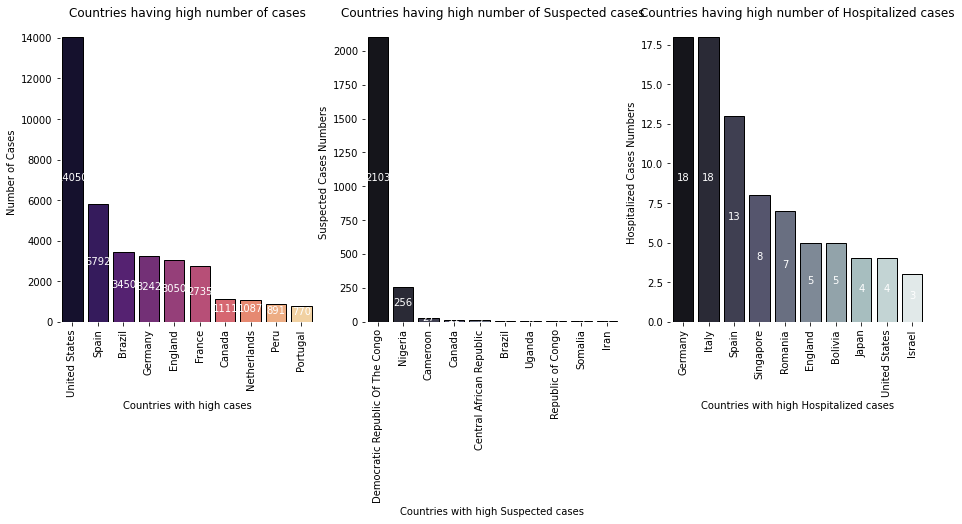

In [18]:
fig, axes = plt.subplots(1,3,figsize=(13,5))
plt.tight_layout(pad=2)
sns.set_style(style="whitegrid")

sns.barplot(x="Country",y="Confirmed_Cases",data=t10_countries_Conf.iloc[:10],palette='magma',linewidth=1,edgecolor="Black",ax=axes[0])
axes[0].set_ylabel("Number of Cases")
axes[0].set_xlabel("Countries with high cases")
axes[0].set_title("Countries having high number of cases")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90)
for container in axes[0].containers:
    axes[0].bar_label(container,label_type="center",color="white",padding=2)


sns.barplot(x="Country",y="Suspected_Cases",data=t10_countries_Susp.iloc[:10],palette='bone',linewidth=1,edgecolor="Black",ax=axes[1])
axes[1].set_ylabel("Suspected Cases Numbers")
axes[1].set_xlabel("Countries with high Suspected cases")
axes[1].set_title("Countries having high number of Suspected cases")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 90)
for container in axes[1].containers:
    axes[1].bar_label(container,label_type="center",color="white",padding=2)

sns.barplot(x="Country",y="Hospitalized",data=t10_countries_Hosp.iloc[:10],palette='bone',linewidth=1,edgecolor="Black",ax=axes[2])
axes[2].set_ylabel("Hospitalized Cases Numbers")
axes[2].set_xlabel("Countries with high Hospitalized cases")
axes[2].set_title("Countries having high number of Hospitalized cases")
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation = 90)
for container in axes[2].containers:
    axes[2].bar_label(container,label_type="center",color="white",padding=2)


sns.despine(left=True,bottom=True,right=True,top=True)

The above barplots show the Confirmed Cases, Suspected Cases and Hospitalized Cases in the top 10 countries

# Maps

In [19]:
!pip install country_converter -q
import country_converter as coco

import plotly.io as pio
pio.templates

     |████████████████████████████████| 53 kB 2.2 MB/s 


Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

**Geographical Distribution of Confirmed Cases**

In [20]:
df_worldwide_cases['CountryCode'] = coco.convert(names = df_worldwide_cases['Country'], to = 'ISO3')

fig = px.choropleth(df_worldwide_cases,
                    locations = "CountryCode",
                    color = "Confirmed_Cases",
                    hover_name = "Country",
                    color_continuous_scale='icefire',
                    # color_continuous_scale = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"],
                    projection = 'natural earth',
                    template = 'gridon',
                    title = 'Geographical Distribution of Confirmed Cases<br><sub>Natural Projection</sub>',
                    height = 600,
                    width = 840,
                   )

fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )

fig.show()

In [21]:
fig = px.choropleth(df_worldwide_cases,
                    locations = "CountryCode",
                    color = "Confirmed_Cases",
                    hover_name = "Country",
                    color_continuous_scale='icefire',
                    projection = 'orthographic',
                    template = 'gridon',
                    title = 'Geographical Distribution of Confirmed Cases<br><sub>Orthographic Projection</sub>',
                    height = 600,
                    width = 840,
                   )

fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )

fig.show()


**Map of the Asia with Monkeypox Confirmed Cases** 

In [22]:
fig = px.choropleth(data_frame=df_worldwide_cases,
                    locations="Country",
                    locationmode="country names",
                    color="Confirmed_Cases",
                    color_continuous_scale="icefire",
                    height=600,
                    scope="asia",
                    width = 840,
                    labels={"Confirmed_Cases":"Confirmed Cases"},)
fig.update_layout(title={"text": "Confirmed Cases of Monkeypox in Asia",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

**Map representation of Monkeypox Confirmed Cases for top 3 Continents**

In [23]:
fig = px.choropleth(data_frame=df_worldwide_cases,
                    locations="Country",
                    locationmode="country names",
                    color="Confirmed_Cases",
                    color_continuous_scale="icefire",
                    height=600,
                    width = 840,
                    scope="north america",
                    labels={"Confirmed_Cases":"Confirmed Cases"})
fig.update_layout(title={"text": "Confirmed Cases of Monkeypox in North America",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

In [24]:
fig = px.choropleth(data_frame=df_worldwide_cases,
                    locations="Country",
                    locationmode="country names",
                    color="Confirmed_Cases",
                    color_continuous_scale="icefire",
                    height=600,
                    width = 840,
                    scope="south america",
                    labels={"Confirmed_Cases":"Confirmed Cases"})
fig.update_layout(title={"text": "Confirmed Cases of Monkeypox in South America",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

In [25]:
fig = px.choropleth(data_frame=df_worldwide_cases,
                    locations="Country",
                    locationmode="country names",
                    color="Confirmed_Cases",
                    color_continuous_scale="icefire",
                    height=600,
                    width = 840,
                    scope="europe",
                    labels={"Confirmed_Cases":"Confirmed Cases"})
fig.update_layout(title={"text": "Confirmed Cases of Monkeypox in Europe",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()


# Bar Plot

**Bar plot representattion of Hosptitalized Cases with Confirmed Cases**

In [26]:
# import matplotlib
# matplotlib.__version__ ## returns 3.2.2

In [27]:
# !pip install matplotlib --upgrade

In [28]:
# The dataframe sorted by Confirmed_Cases to plot for Hospitalized cases
df_hosp_conf_cases = df_worldwide_cases.sort_values(by = "Confirmed_Cases", ascending = False)
top10Conf = df_hosp_conf_cases[:10]

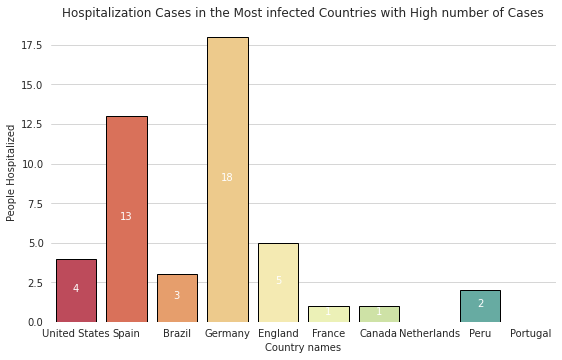

In [29]:
from mpl_toolkits.mplot3d.axes3d import Axes
fig, axes = plt.subplots(1,figsize=(8,5))
plt.tight_layout(pad=2)
sns.set_style(style="whitegrid")

sns.barplot(y=top10Conf.Hospitalized,x=top10Conf.Country,palette='Spectral',linewidth=1,edgecolor="Black",ax=axes)
axes.set_title("Hospitalization Cases in the Most infected Countries with High number of Cases")
axes.set_ylabel("People Hospitalized")
axes.set_xlabel("Country names")
for container in axes.containers:
    axes.bar_label(container,label_type="center",color="white",padding=2)


sns.despine(left=True,bottom=True,right=True,top=True)

The above plot represents Hospitalizations in the countries with most number of confirmed cases i.e


*   Germany and Brazil has the highest number of Hospitalized Cases.
*   Although, USA has double the number of Confirmed Cases, it has significantly less number of Hospitalized Cases.



# Correlation Plot

**Correlation Plot for Confirmed Cases**

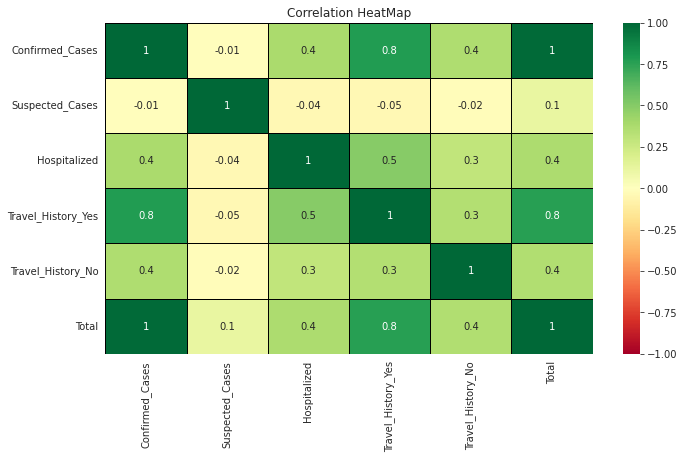

In [30]:
fig, axes = plt.subplots(1,figsize=(10,6))
plt.tight_layout(pad=4)

cor = df_worldwide_cases.corr(method="pearson")
sns.heatmap(cor,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap="RdYlGn",linewidths=1,linecolor="Black",ax=axes)
axes.set_title("Correlation HeatMap")
axes.set_xticklabels(axes.get_xticklabels(),rotation = 90)

sns.despine(left=True,bottom=True,right=True,top=True)

The above Correlation heatmap represents:


*   Travel history is highly correlated to Confirmed Cases i.e Confirmed Cases are highly dependent upon Travelling history where travelling has an high impact on spreading of virus..
*   Travel history is moderately correlated to Suspected Cases.



# Monkeypox First Case

In [31]:
df_daily_countryWise

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41077,2022-08-18,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41078,2022-08-18,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41079,2022-08-18,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41080,2022-08-18,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
First_case = df_daily_countryWise.sort_values(by=['Date_confirmation'],ascending=True).head(1)
First_case.style.background_gradient(cmap='Pastel1_r')
#print("The MoneyPox first Case was found in",First_case.Country[0],"on",First_case.Date_confirmation[0])

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,nan,nan,nan,nan,nan,nan,nan


**The MoneyPox first Case was found in 2022-01-31 at Nigeria**

# Data Cleaning for df_detection_timeline

In [33]:
df_detection_timeline

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,167,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Guatemala,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
92,Moldova,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
93,Greenland,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
94,Honduras,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0


In [34]:
# Checking whether is there any Uncertainity or Inconsistance in data
for col in df_detection_timeline:
  print("'"+col+"',")

'Country',
'2022-01-31',
'2022-02-17',
'2022-02-28',
'2022-03-04',
'2022-03-31',
'2022-04-10',
'2022-04-12',
'2022-04-30',
'2022-05-06',
'2022-05-08',
'2022-05-12',
'2022-05-13',
'2022-05-15',
'2022-05-17',
'2022-05-18',
'2022-05-19',
'2022-05-20',
'2022-05-21',
'2022-05-23',
'2022-05-24',
'2022-05-25',
'2022-05-26',
'2022-05-27',
'2022-05-28',
'2022-05-29',
'2022-05-30',
'2022-05-31',
'2022-06-01',
'2022-06-02',
'2022-06-03',
'2022-06-04',
'2022-06-05',
'2022-06-06',
'2022-06-07',
'2022-06-08',
'2022-06-09',
'2022-06-10',
'2022-06-11',
'2022-06-12',
'2022-06-13',
'2022-06-14',
'2022-06-15',
'2022-06-16',
'2022-06-17',
'2022-06-18',
'2022-06-19',
'2022-06-20',
'2022-06-21',
'2022-06-22',
'2022-06-23',
'2022-06-24',
'2022-06-25',
'2022-06-26',
'2022-06-27',
'2022-06-28',
'2022-06-29',
'2022-06-30',
'2022-07-01',
'2022-07-02',
'2022-07-03',
'2022-07-04',
'2022-07-05',
'2022-07-06',
'2022-07-07',
'2022-07-08',
'2022-07-09',
'2022-07-10',
'2022-07-11',
'2022-07-12',
'2022-07-13',
'2022-07-

**Data Wrangling**

In [35]:
dates = ['2022-01-31','2022-02-17','2022-02-28','2022-03-04','2022-03-31','2022-04-10','2022-04-12','2022-04-30','2022-05-06','2022-05-08','2022-05-12',
         '2022-05-13','2022-05-15','2022-05-17','2022-05-18','2022-05-19','2022-05-20','2022-05-21','2022-05-23','2022-05-24','2022-05-25','2022-05-26',
         '2022-05-27','2022-05-28','2022-05-29','2022-05-30','2022-05-31','2022-06-01','2022-06-02','2022-06-03','2022-06-04','2022-06-05','2022-06-06',
         '2022-06-07','2022-06-08','2022-06-09','2022-06-10','2022-06-11','2022-06-12','2022-06-13','2022-06-14','2022-06-15','2022-06-16','2022-06-17',
         '2022-06-18','2022-06-19','2022-06-20','2022-06-21','2022-06-22','2022-06-23','2022-06-24','2022-06-25','2022-06-26','2022-06-27','2022-06-28',
         '2022-06-29','2022-06-30','2022-07-01','2022-07-02','2022-07-03','2022-07-04','2022-07-05','2022-07-06','2022-07-07','2022-07-08','2022-07-09',
         '2022-07-10','2022-07-11','2022-07-12','2022-07-13','2022-07-14','2022-07-15','2022-07-16','2022-07-17','2022-07-18','2022-07-19','2022-07-20',
         '2022-07-21','2022-07-22','2022-07-23','2022-07-24','2022-07-25','2022-07-26','2022-07-27','2022-07-28','2022-07-29','2022-07-30','2022-07-31',
         '2022-08-01','2022-08-02','2022-08-03','2022-08-04','2022-08-05','2022-08-06','2022-08-07','2022-08-08','2022-08-09','2022-08-10','2022-08-11',
         '2022-08-12','2022-08-13','2022-08-14','2022-08-15','2022-08-16','2022-08-17','2022-08-18']

cnfrm_data = df_detection_timeline.melt(id_vars=['Country'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

In [36]:
cnfrm_data

,Country,Date,Confirmed
0,Nigeria,2022-01-31,3
1,Cameroon,2022-01-31,0
2,Central African Republic,2022-01-31,0
3,Republic of Congo,2022-01-31,0
4,England,2022-01-31,0
...,...,...,...
10171,Guatemala,2022-08-18,0
10172,Moldova,2022-08-18,0
10173,Greenland,2022-08-18,0
10174,Honduras,2022-08-18,0


In [37]:
df_processed = cnfrm_data.groupby(by='Date')['Confirmed'].sum().reset_index()
# cumulative count of the Monkeypox confirmed cases
df_processed['Confirmed'] = df_processed['Confirmed'].cumsum()

df_processed

,Date,Confirmed
0,2022-01-31,3
1,2022-02-17,6
2,2022-02-28,7
3,2022-03-04,9
4,2022-03-31,15
...,...,...
101,2022-08-14,36067
102,2022-08-15,37540
103,2022-08-16,38861
104,2022-08-17,39990


# Write Processed Data to CSV

In [38]:
df_processed.to_csv("/content/gdrive/MyDrive/Monkeypox/Processed/Monkeypox_processed.csv",index=False)